#Machine Learning Project

> **Domain**: Health

> **ONU Goal**: 3. Good Health and well-being

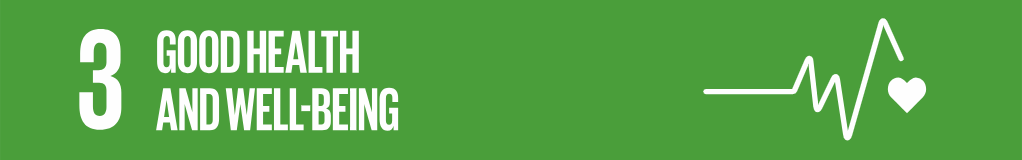

> **Project Goal**: Predict pacients with heart disease

> **Databases**:

* https://www.kaggle.com/johnsmith88/heart-disease-dataset





##1. Introduction

---



*Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.*
*Heart failure is a common event caused by CVDs.*

*Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.*

*People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.*

The chosen data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Reference(https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds))

---

###Variables used in the dataset



1. Age
2. sex
3. Chest pain type (4 values)
4. Resting blood pressure
5. Serum cholestoral in mg/dl
6. Fasting blood sugar > 120 mg/dl
7. Resting electrocardiographic results (values 0,1,2)
8. Maximum heart rate achieved
9. Exercise induced angina
10. Oldpeak = ST depression induced by exercise relative to rest
11. The slope of the peak exercise ST segment
12. Number of major vessels (0-3) colored by flourosopy
13. Thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

####Observations:

* Thal in 13. variable stands for a disease called Thalassemia. This disease affects the proteins that carries oxigens on the blood.
* Angina in 9. variable is a symptom to coronary artery disease.




In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rcParams['figure.figsize'] = 10,6
rcParams['figure.dpi'] = 100

In [ ]:
data = pd.read_csv("heart.csv")

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data.shape

(1025, 14)

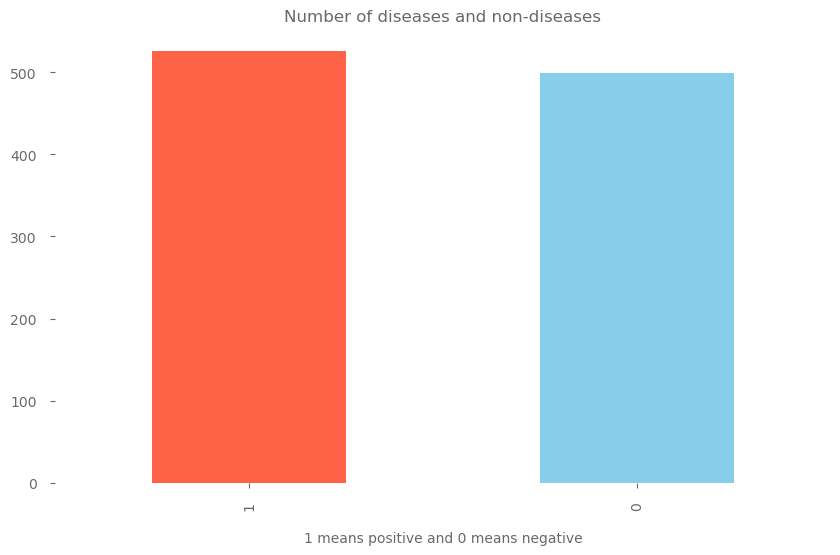

In [ ]:
ax = data.target.value_counts().plot(kind='bar', color=['tomato','skyblue'], width=.5);

plt.title("Number of diseases and non-diseases", c='dimgray');
ax.set_xlabel("1 means positive and 0 means negative", c='dimgray', ha='center', labelpad=15)

# remove spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# set ticks
ax.tick_params(colors='dimgray', direction='out')
ax.xaxis.set_tick_params(pad=10)
ax.yaxis.set_tick_params(pad=10)

for tick in ax.get_xticklabels():
    tick.set_color('dimgray')
for tick in ax.get_yticklabels():
    tick.set_color('dimgray')

In [ ]:
# We have a balanced target class

## Data tree

In [ ]:
# Feature selection #
# Dentro do Scikit Learn há varios metodos de feature selection  #
# https://scikit-learn.org/stable/modules/feature_selection.html #
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectPercentile, chi2

In [ ]:
X = data.drop(columns='target').copy()
y = data.target.copy()

model=SelectPercentile(chi2, percentile=90)
model.fit(X,y)

best_cols = model.get_support(indices=True)

# 90% of best features
best_data = data[X.columns[best_cols]].copy()
best_data['target'] = y

In [ ]:
def split_train_test(dataset: pd.DataFrame, percentage_of_test: float):
    '''
    Function to split dataset in train and test data, making this process randomicaly
    '''
    dataset.reset_index(drop=True, inplace=True)
    
    df_size = len(dataset)

    test_size = int(percentage_of_test*df_size)

    idxs_test= np.random.choice(range(0,df_size), test_size, replace=False)

    idxs_train = list(set(dataset.index.values)-set(idxs_test))

    test = dataset.iloc[idxs_test]
    train = dataset.iloc[idxs_train]
    
    x_train, y_train = train.drop(columns='target').values , train.target.values 
    x_test, y_test = test.drop(columns='target').values , test.target.values
    
    return x_train, y_train, x_test, y_test

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()

x_train, y_train, x_test, y_test = split_train_test(dataset = best_data, percentage_of_test = .3)

clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("accuracy score : ",round(accuracy_score(y_test, y_pred),2))

accuracy score :  1.0


In [ ]:
# --------------------------------------------------------------

## <center> Bias and Variance </center>
###1. What is Bias?

Bias, also called in portuguese "Viés",is the difference between the average of prediction values of our model and the real value that we want to predict, that is, is the inability of a model method get a true relation of the correct values. A model with high bias tends to have low relation with the correct values.

##2. What is Variance?

The variance is the variability of the model prevision for a certain value which inform us the dissemination of out data, in another words, the variance of a model is the difference that a model fits the training and test data. A model with high variance shows a big difference between
the sum of squares (error) between the training and test data. 

## <center> Overfitting vs Underfitting </center>

<center>What is overfitting and underfitting, and what the relation with Bias and Variance?</center>

When a model fits perfectly with the trainning data, but not fits very well with the data test, we say that there was an overfitting.
Overfitting occurs when there are low Bias and High Variance.
And when the opposite occurs, high Bias and low Variance, represents a Underfitting of model.


In the example below we will show the model differences for a given dataset (The data was generated randomly). The MSE (Mean squared error) and cross validation are also calculated to show the results validation. How much the MSE value are greater, are worse.

In the example below, it is possible to observe that for linear regression an underfitting occurs, and for a 15 degree model there is an overfitting. And the perfect model would be a 4 degree model.


Font: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py


In the code bellow we are gonna import all the libraries needed to develop our example. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1


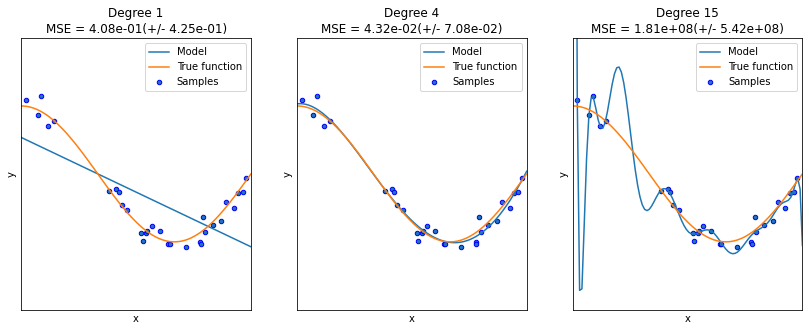

In [ ]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

## <center> Applying the ideas of Bias and Variance</center>

## <center>Applying a database over a Decision Tree model.</center> 

A classification model will be applied, specifying, a decision tree model, on the heart disease data. After that, we will apply methods are used to evaluate the model.

In [ ]:
def run_tree_model_n_times(df: pd.DataFrame, times: int):
    acuracy = []
    
    for _ in range(times):
        clf = tree.DecisionTreeClassifier()
        
        x_train, y_train, x_test, y_test = split_train_test(dataset = df, percentage_of_test = .3)
        clf = clf.fit(x_train, y_train)
        
        # score function make the prediction and scores the result
        acuracy.append(clf.score(x_test,y_test))
    
    return  pd.DataFrame({'acuracy':acuracy})

In [ ]:
metrics_model = run_tree_model_n_times(best_data, 150) 

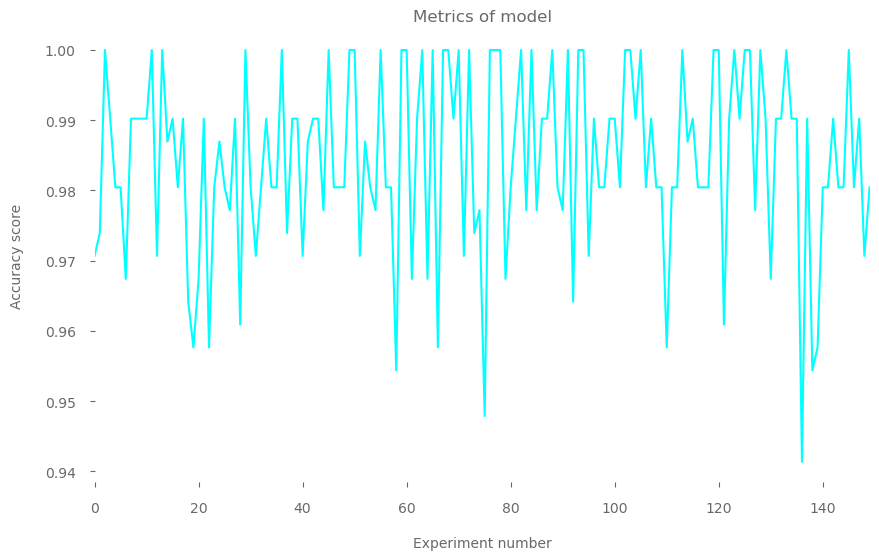

In [ ]:
ax = metrics_model.plot(kind='line', color='cyan', legend=False)

plt.title("Metrics of model", c='dimgray');
ax.set_xlabel("Experiment number", c='dimgray', ha='center', labelpad=15)
ax.set_ylabel("Accuracy score", c='dimgray', ha='center', labelpad=15)

# remove spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# set ticks

# ax.set_xticks(metrics_model.index+1)
ax.tick_params(colors='dimgray', direction='out')
ax.xaxis.set_tick_params(pad=10)
ax.yaxis.set_tick_params(pad=10)

for tick in ax.get_xticklabels():
    tick.set_color('dimgray')
for tick in ax.get_yticklabels():
    tick.set_color('dimgray')

In [ ]:
# even when we shuffle the train data and test data several times, the model performs well

## Sampling
Data sampling is a statistical analysis technique used to select, manipulate and analyze a representative subset of data points to identify patterns and trends in the larger data set being examined. It enables data scientists, predictive modelers and other data analysts to work with a small, manageable amount of data about a statistical population to build and run analytical models more quickly, while still producing accurate findings.

In [ ]:
# Random Sample
# Bellow we can see an example of a random sampling

row1 = data.sample(60)
row1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
187,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0
822,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
539,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
42,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1
973,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
232,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
337,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1


### Holdout Sampling

Holdout Method is the simplest sort of method to evaluate a classifier. In this method, the data set is separated into two sets, called the Training set and Test set.

A classifier performs function of assigning data items in a given collection to a target category or class.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,data, test_size=0.4, random_state=42)
print(len(x_train), len(x_test))
print(len(y_train), len(y_test))

615 410
615 410


In [ ]:
import numpy as np

x = data.reset_index(drop=True, inplace=True)
y = len(data)

test_size = int(0.4*y)

idxs_test= np.random.choice(range(0,y), test_size, replace=False)

idxs_train = list(set(data.index.values)-set(idxs_test))

test = data.iloc[idxs_test]
train = data.iloc[idxs_train]
    
x_train, y_train = train.drop(columns='target').values, train.target.values 
x_test, y_test = test.drop(columns='target').values, test.target.values

print(len(x_train), len(x_test))
print(len(y_train), len(y_test))

615 410
615 410
